In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
import pydot
from networkx.drawing.nx_agraph import graphviz_layout
import os,sys
from scipy import stats
from scipy.stats import linregress
import matplotlib as mpl


In [2]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-Sine2hr/')
#os.chdir('/home/esb/Projects/uJ/uJ_master/experiments/HT-Sine2hr/')

In [3]:
sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
#from readroi import *
#from TrackingFunctions import *
#from PlottingFunctions import *
from DataManagers import *
from PlottingFunctions import *

Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [4]:
expeLabel="HT-LB"
rootDir="../../data_sample/HT-LB/"
trap="xy03"
trap_list="xy03,xy03-1".split(",")  




In [6]:
trap_df_lineages=[]
for i,trap in enumerate(trap_list):
    
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()

Loading 168 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03_lineages_all.csv
Loading 15 lineages from ../../data_sample/HT-LB/data/lineages/HT-LB_xy03-1_lineages_all.csv


In [7]:
df_lineages.head()

,lineageID,trackID,cellID,motherID,frame,length,division,dead,GFP,DsRed,RelInt,AbsInt
0,1,1.014-865.000,1.014,1.014,1,28.068742,0,0,252.642,199.722,1.627566,0.841896
1,1,1.014-865.000,2.013,1.014,2,30.327122,0,0,250.377,196.886,1.621610,0.832634
2,1,1.014-865.000,3.015,1.014,3,30.966216,0,0,256.052,197.249,1.598546,0.844838
3,1,1.014-865.000,4.013,1.014,4,32.287331,1,0,252.726,195.358,1.602397,0.834949
4,1,1.014-865.000,5.015,1.014,5,15.382588,0,0,238.511,186.522,1.615407,0.791485


In [51]:
def get_relative_color(this_relInt,cmap):
    
    this_color=cmap(this_relInt/np.pi)
    return this_color

def get_nodes_colors(Gl,lineagesDF,cmap):
    nodes_colors=[]
    
    for node in Gl.nodes():
        #print(type(node))
        this_relInt=lineagesDF[lineagesDF['cellID']==float(node)].RelInt.unique()[0]
        this_relInt=float(this_relInt)
        this_color=get_relative_color(this_relInt,cmap)
        nodes_colors.append(this_color)
    
    return nodes_colors


## Make the Graph

In [64]:
trap_G=[]
trap_Gs=[]
for it,trap in enumerate(trap_list):
    
    df_lineages=trap_df_lineages[it]
    
    trackID_list=df_lineages.trackID.unique()
    lineageID_list=df_lineages.lineageID.unique()
    G=nx.DiGraph()
    big_node_list=[]
    Gs=[]
    size=len(lineageID_list)
    print(size)
    cont=0
    for i,this_lineageID in enumerate(lineageID_list):
        print(round(i*100/size,3),"%",end='\r')
        sub_df1=df_lineages[df_lineages['lineageID']==this_lineageID]
        Gtemp=nx.DiGraph()
        for this_trackID in trackID_list:
            sub_df=sub_df1[sub_df1['trackID']==this_trackID]


            cellID_list=sub_df.cellID.tolist()

            for this_cellID in cellID_list:
                big_node_list.append(this_cellID)
                cont+=1
                G.add_node(str(this_cellID))
                Gtemp.add_node(str(this_cellID))
            for i in range(len(cellID_list)-1):
                node1=str(cellID_list[i])
                node2=str(cellID_list[i+1])
                G.add_edge(node1,node2)
                Gtemp.add_edge(node1,node2)
        Gs.append(Gtemp)
    
    print(G.size(),len(big_node_list),len(list(set(big_node_list))),cont)
    trap_G.append(G)
    trap_Gs.append(Gs)

168
83289 89250 83445 89250
15
909533 % 10343 9109 10343


## Get nodes color

In [1]:

ncolors=50
cmap = cm.get_cmap("RdYlGn", ncolors)
# trap_node_colors=[]
# for it,trap in enumerate(trap_list):
#     G=trap_Gs[it]
#     df_lineages=trap_df_lineages[it]
#     node_colors=get_nodes_colors(G,df_lineages,cmap)
#     trap_node_colors.append(node_colors)

    


NameError: name 'cm' is not defined

'HT-LB'

## Root the tree

In [ ]:
# a=list(df_lineages['cellID'])
# a.sort()
# frame_0_IDs=[]
# for cellID in a:
#     cellIDF=float(cellID)
#     if(cellIDF<0.9999):
#         frame_0_IDs.append(cellID)
# #     if('0.' in cellID):
# #         frame_0_IDs.append(cellID)
# print(len(set(frame_0_IDs)))
# for i in range(len(frame_0_IDs)-1):
    
#     node1=str(frame_0_IDs[i])
#     node2=str(frame_0_IDs[i+1])
#     G.add_edge(node1,node2)
# node1=str(frame_0_IDs[0])
# node2=str(frame_0_IDs[-1])
# G.add_edge(node1,node2)



## Get Roots

In [66]:
trap_roots=[]
for it,trap in enumerate(trap_list):
    G=trap_G[it]
    
    rootsG=[]
    for node in G.nodes():
        strnode=str(node)
        strnode=strnode.split('.')[0]
        if strnode=='1':
            rootsG.append(node)
    print("Trap %s has %s roots"%(trap,len(rootsG)))
    trap_roots.append(rootsG)

Trap xy03 has 156 roots
Trap xy03-1 has 14 roots


In [67]:
# for it,trap in enumerate(trap_list):
    
#     Gs=trap_Gs[it] #!
    
#     print(trap)
    
#     for G in Gs:
#         posALL_dot = graphviz_layout(G, prog='dot')
#         node_colors=trap_node_colors[it] #!
#         plt.figure(figsize=(20,10)) 

#         #nx.draw(G, pos, node_size=200,node_color=relInts, alpha=0.5,  with_labels=True,cmap=plt.cm.RdYlGn(np.linspace(0,1,101)))
#         #nx.drawG.add_node('A')
#         nx.draw(G, posALL_dot, node_size=5,node_color=node_colors, alpha=0.5,arrows=False , with_labels=False)
#         plt.show()

xy03


IndexError: list index out of range

## Makig sub graphs


xy03 1.161


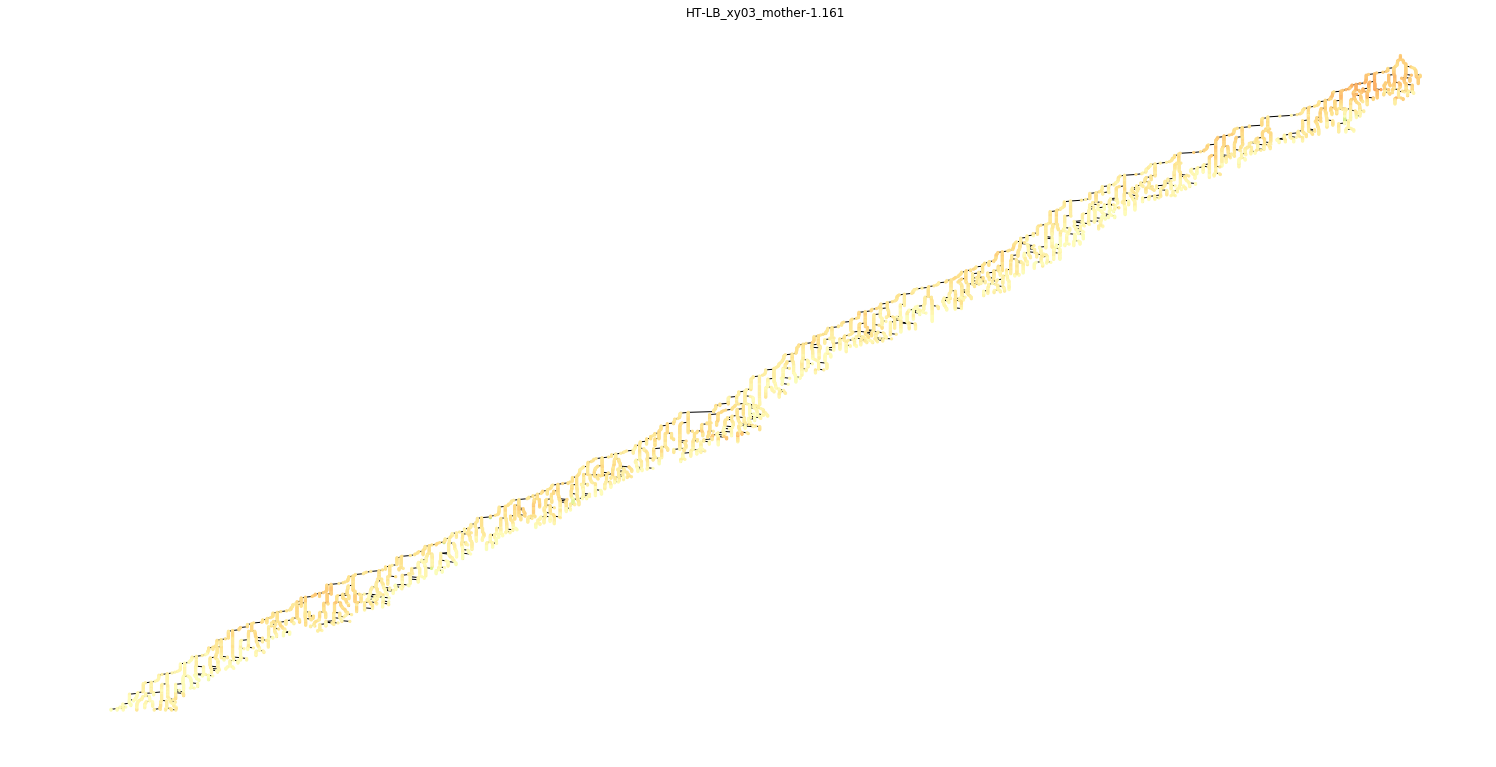

xy03 1.141


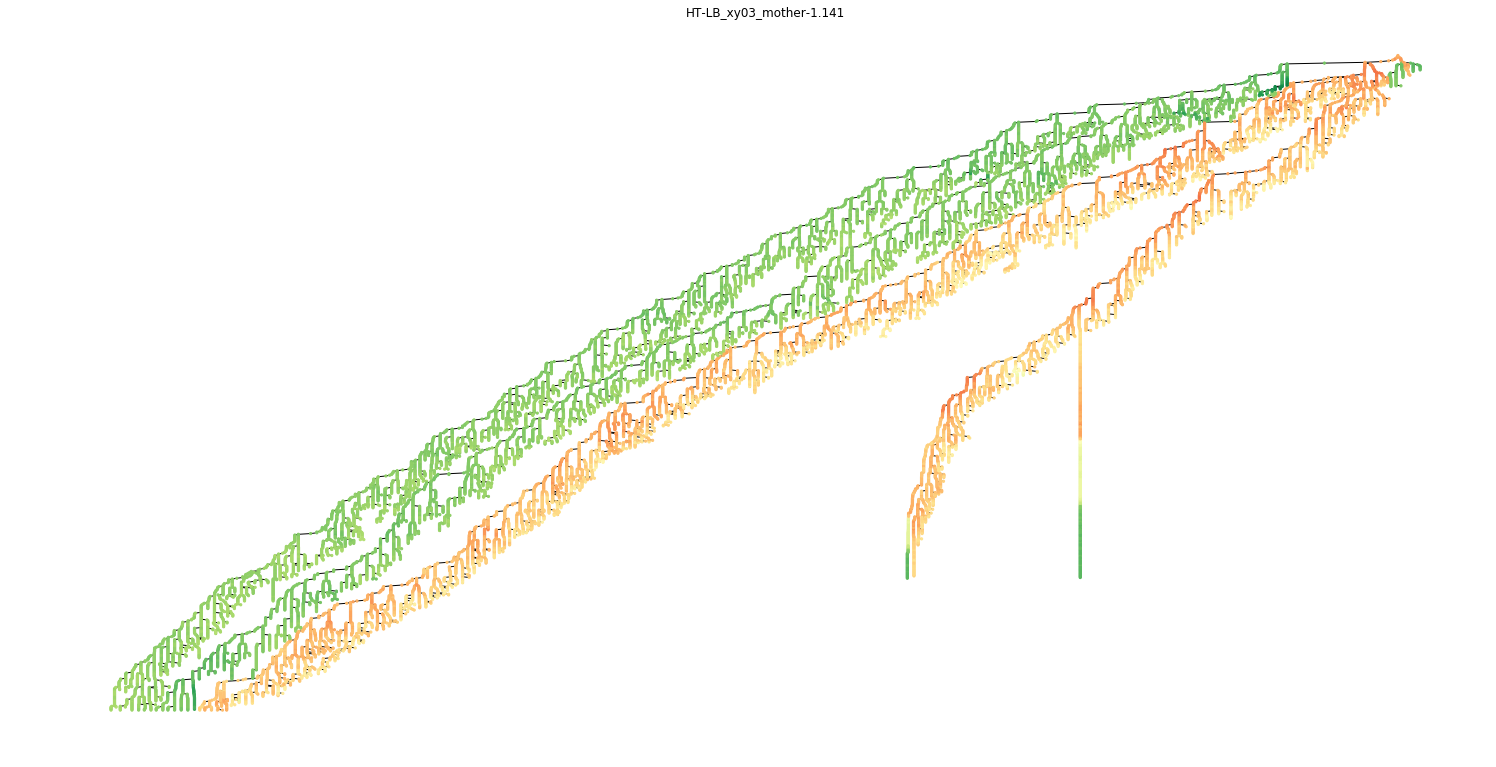

xy03 1.159


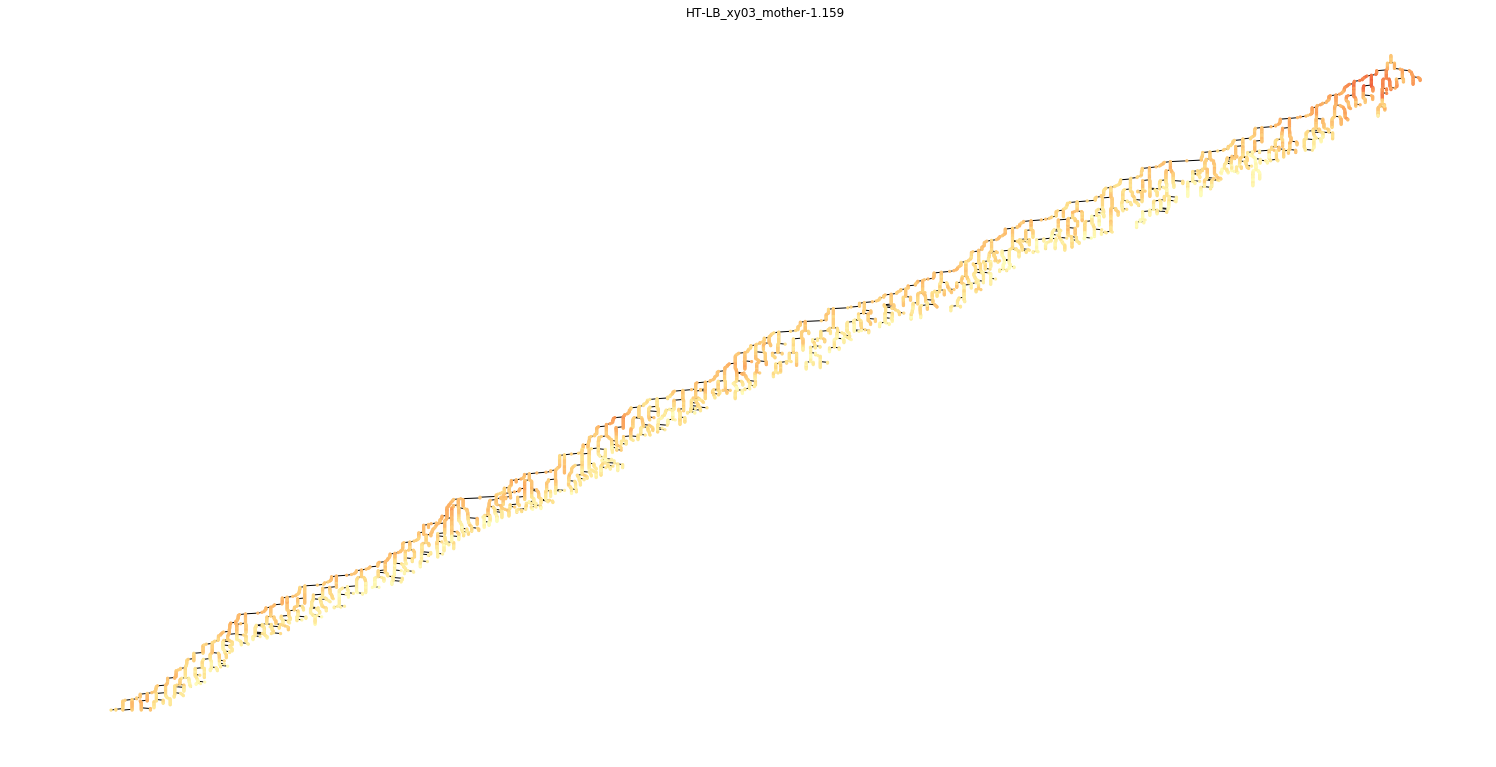

xy03 1.162


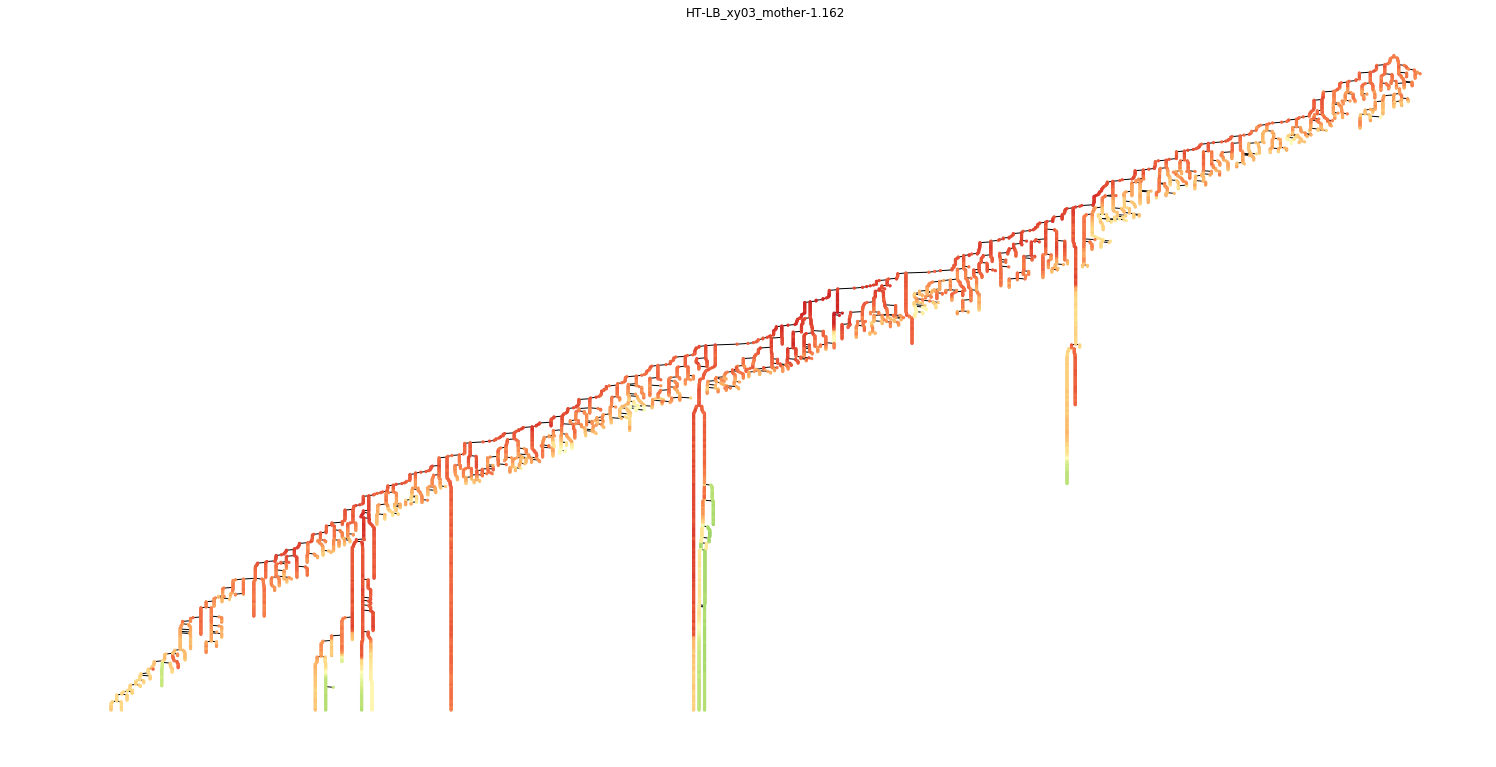

xy03 1.166


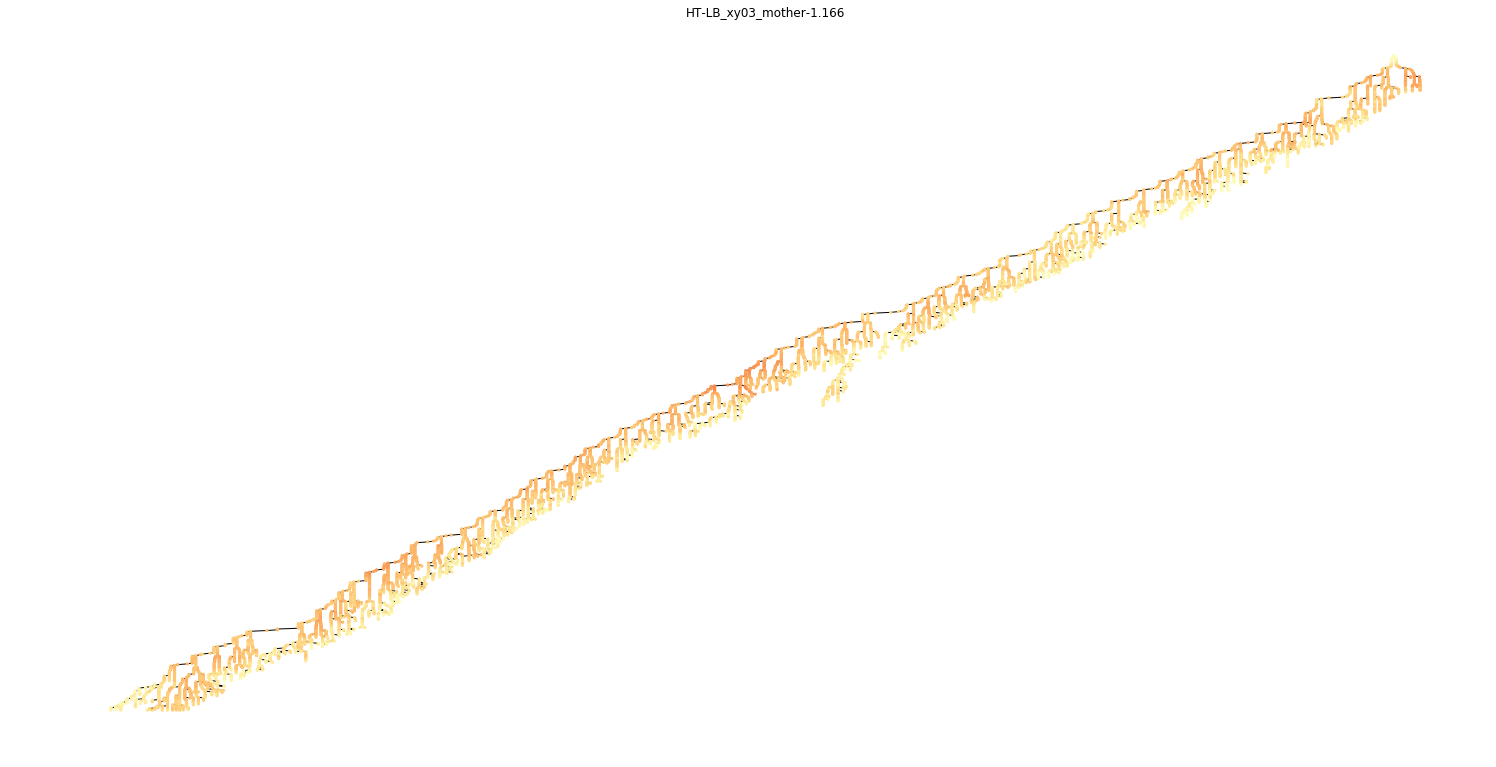

xy03 1.148


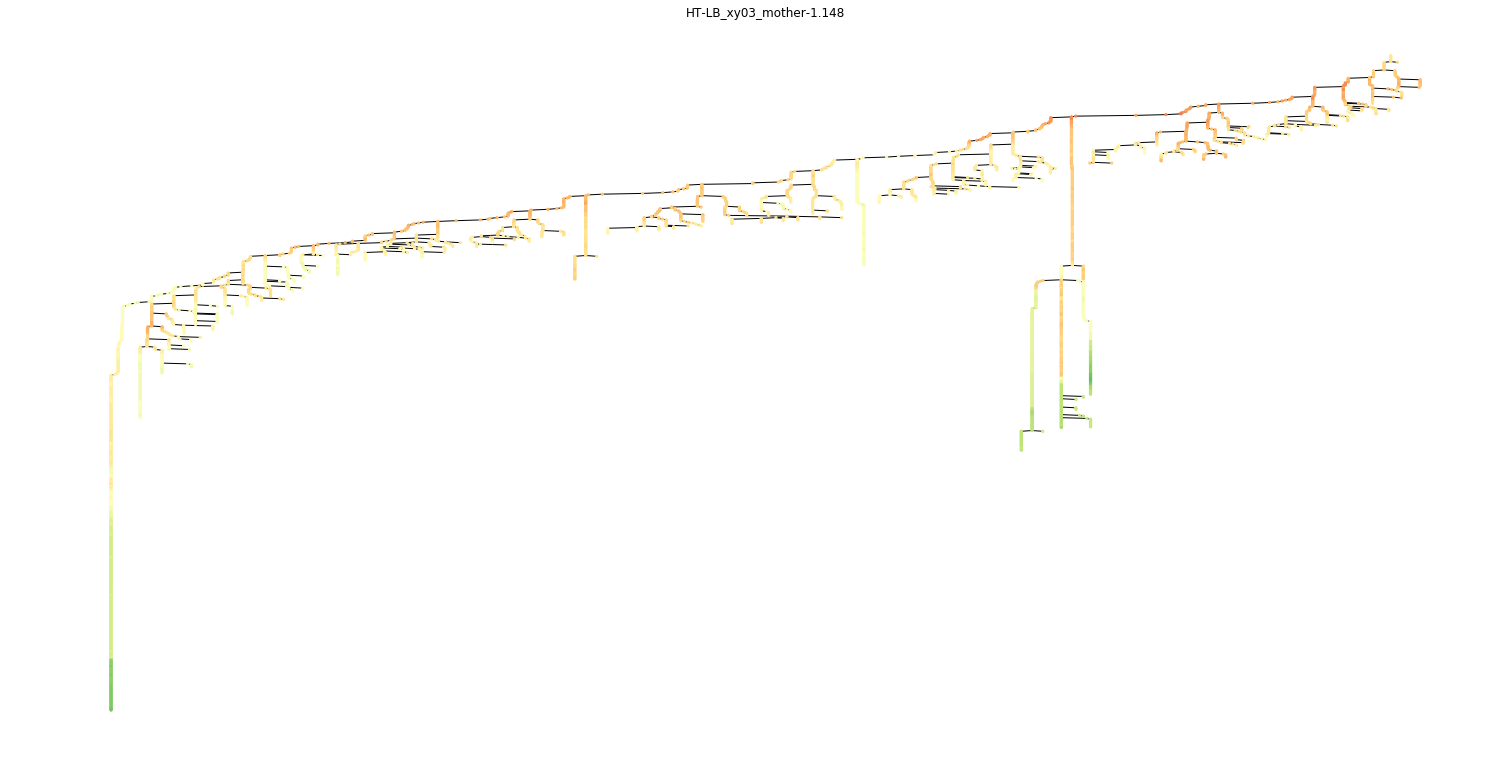

xy03 1.169


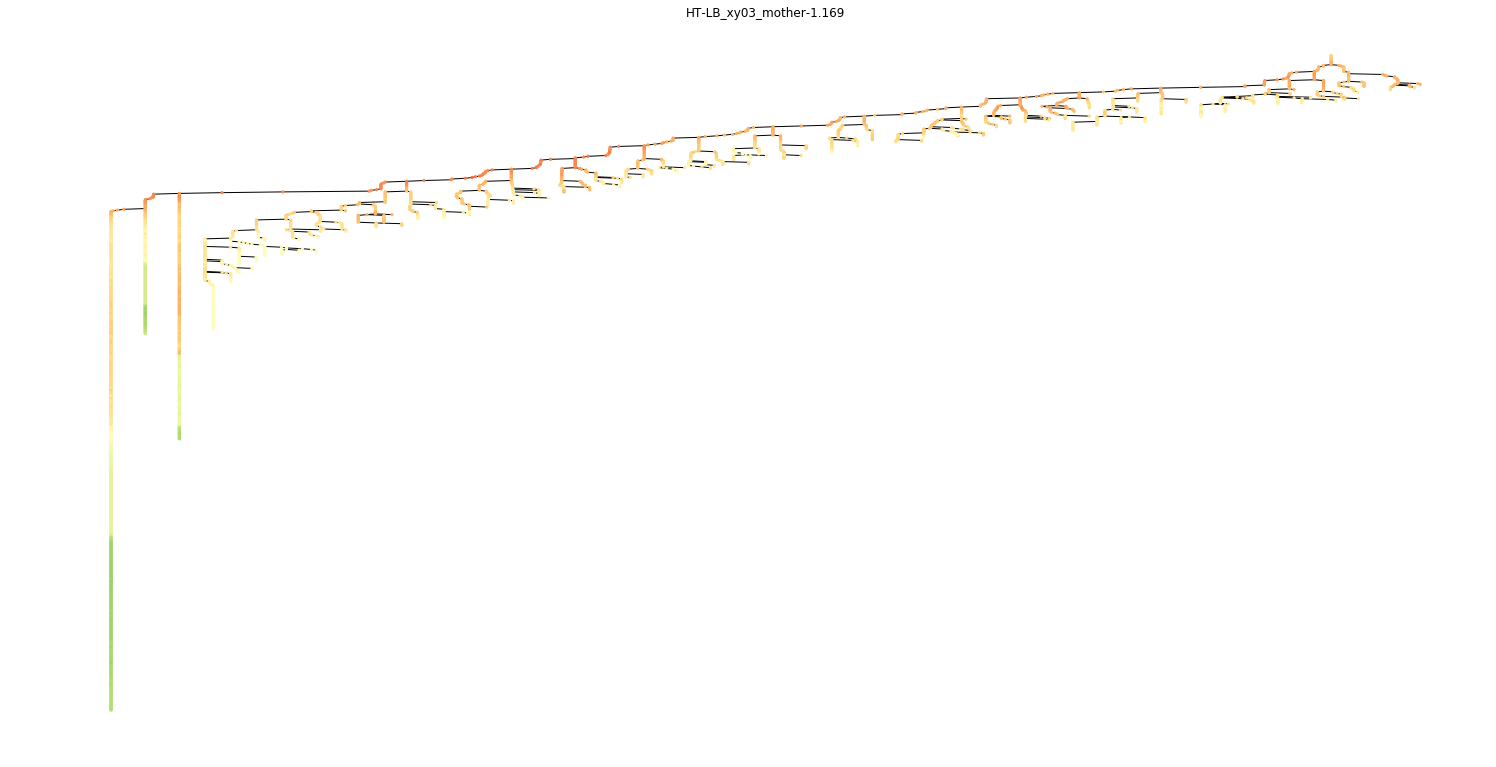

xy03 1.165


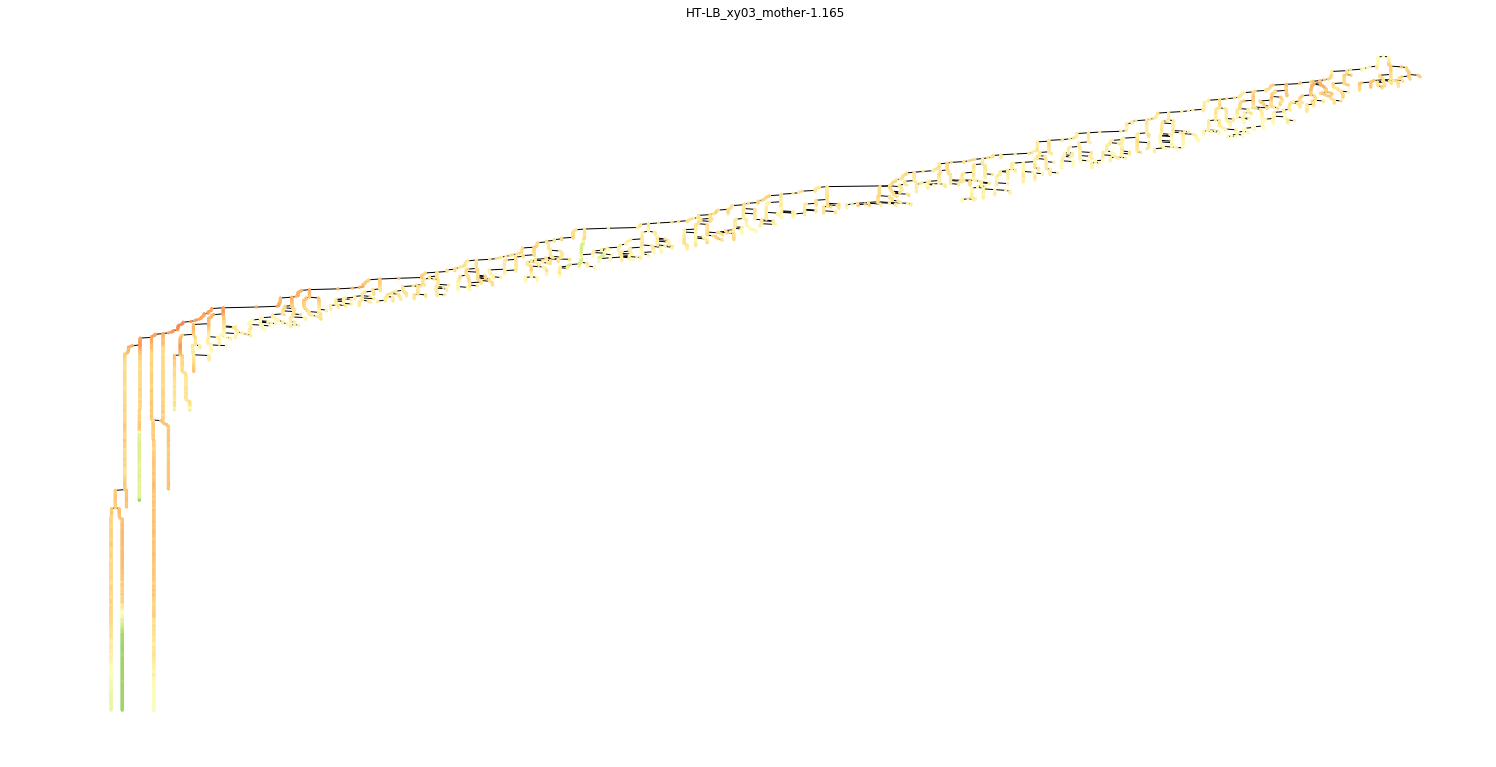

xy03 1.16


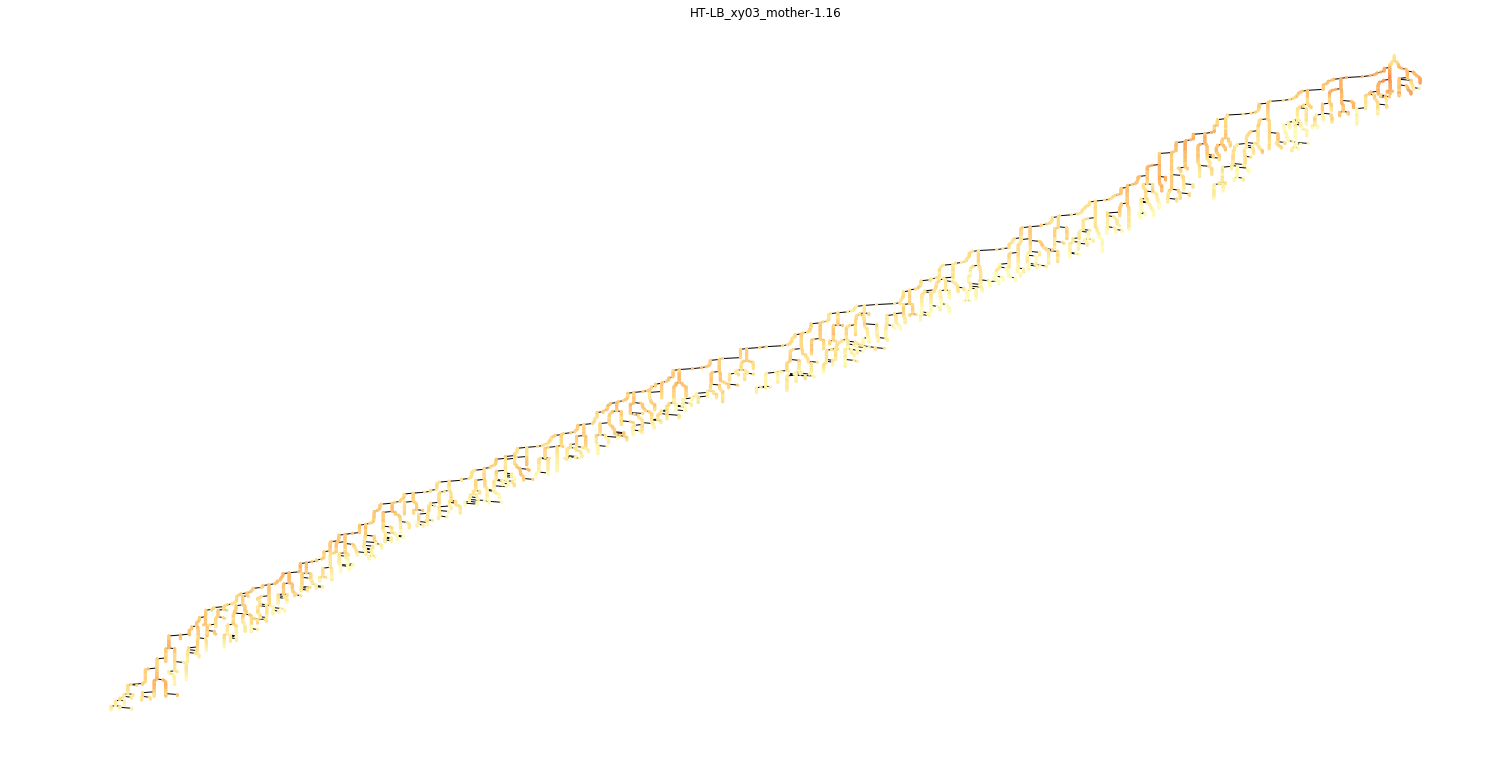

xy03 1.1440000000000001


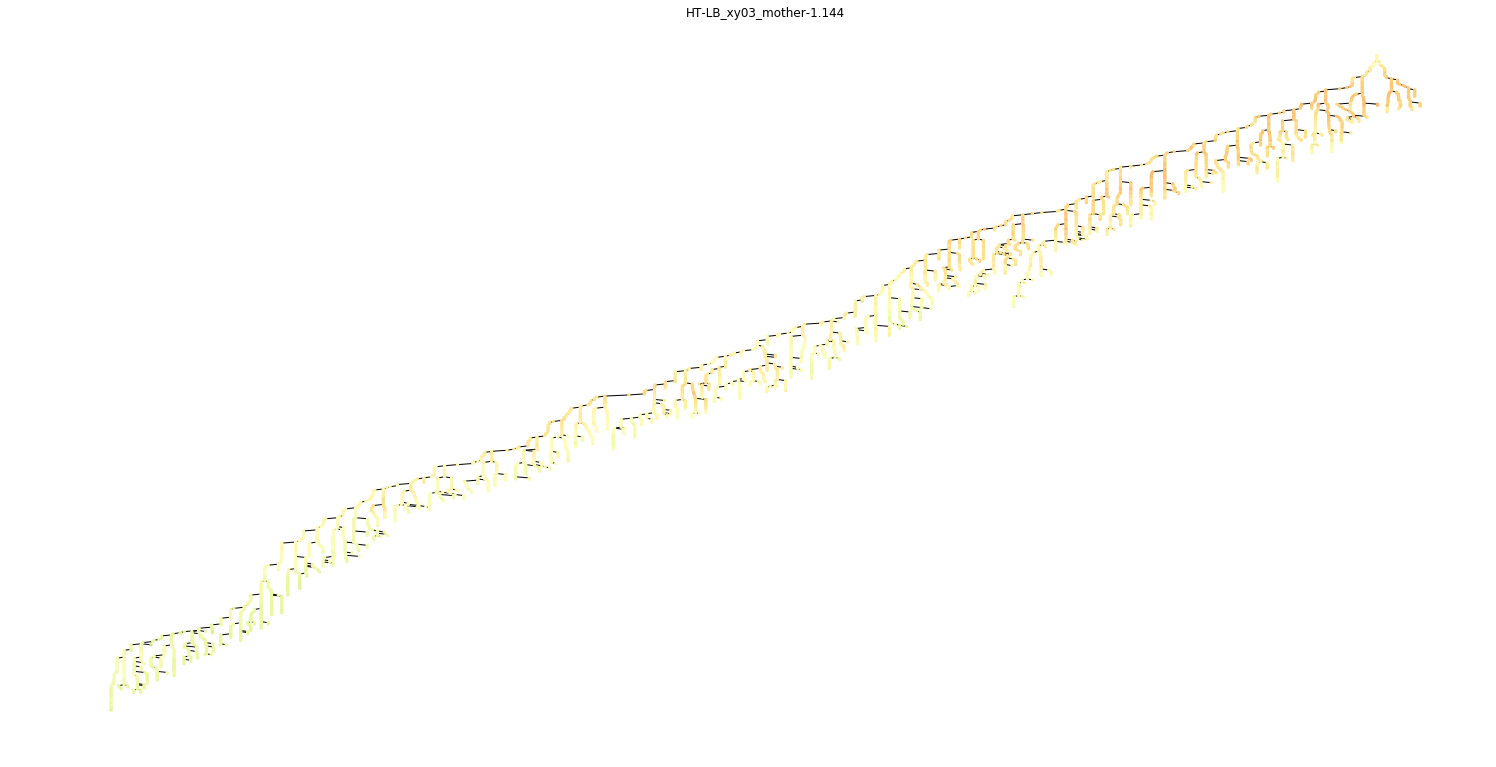

xy03-1 1.014


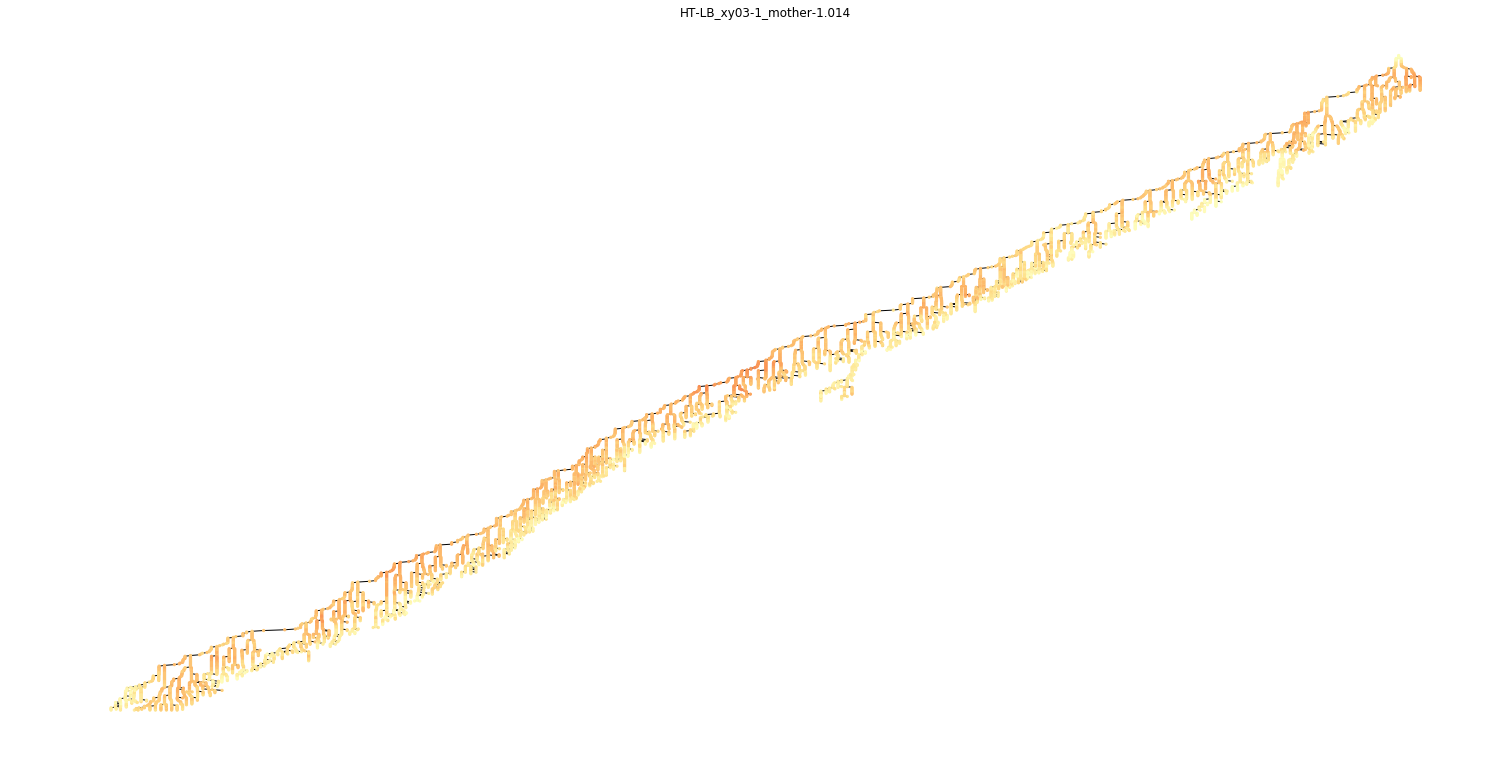

In [80]:

for it,trap in enumerate(trap_list):
    Gs=trap_Gs[it]
    rootsG=trap_roots[it]

    df_lineages=trap_df_lineages[it]
    dir_images=rootDir+'figures/lineages/graphs_trees/'+trap+"/"
    if not os.path.exists(dir_images):
        os.makedirs(dir_images)
    #xxx=nx.nx_agraph.graphviz_layout(G,prog= "dot",args="-Grankdir=TB -Gsplines=false -Gnodesep=.5 -Goverlap=scalexy",root=rootsG[ri])   #progs ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’ #args="-Grankdir=LR"
    
    for G in Gs:
        xxx=graphviz_layout(G, prog='dot')
        for ri in range(0,len(rootsG)):
                
            #print(trap,rootsG[ri])
            if rootsG[ri] in G.nodes():
                xx=nx.descendants(G,source=rootsG[ri])
                xx.add(rootsG[ri])
                gi=G.subgraph(xx)
                if gi.size()<500:
                    continue
                leaves = []
                for (v, d) in gi.out_degree(): 
                    if d == 0:
                        leaves.append(v)    

                #nsz=int(ceil(1000/length(leaves)))
                #println(nsz)
                list_colorsC=get_nodes_colors(gi,df_lineages,cmap)
        #        xxx=graphviz_layout(gi, prog='dot')

                print(trap,rootsG[ri])
                plt.figure(figsize=(20,10))
                #xxx=graphviz_layout(gi, prog='dot')
                #nx.draw_networkx(gi,xxx,node_size=10,node_color=list_colorsC,width=.1,arrows=False,arrowsize=7,font_size=8,with_labels=False)
                nx.draw(gi, xxx, node_size=5,node_color=list_colorsC, alpha=1,arrows=False , with_labels=False)
                plt.title("%s_%s_mother-%s"%(expeLabel,trap,round(float(rootsG[ri]),3)))
                figName="%s%s_%s_mother-%s.png"%(dir_images,expeLabel,trap,round( float(rootsG[ri]) ,3) )
                plt.savefig(figName)
                plt.axis("off")
                plt.show()

In [ ]:
posALL_twopi = graphviz_layout(G, prog='twopi', args='')
pos_twopi_list=[]
for this_Graph in Gs:
    this_pos=graphviz_layout(this_Graph, prog='twopi', args='')
    pos_twopi_list.append(this_pos)

In [ ]:
plt.figure(3,figsize=(12,12)) 

#nx.draw(G, pos, node_size=200,node_color=relInts, alpha=0.5,  with_labels=True,cmap=plt.cm.RdYlGn(np.linspace(0,1,101)))
#nx.drawG.add_node('A')
nx.draw(G, posALL_twopi, node_size=10,node_color=node_colors_all, alpha=0.5,  with_labels=False)

